In [2]:
from commonfunctions import *
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1280, 720, 3)


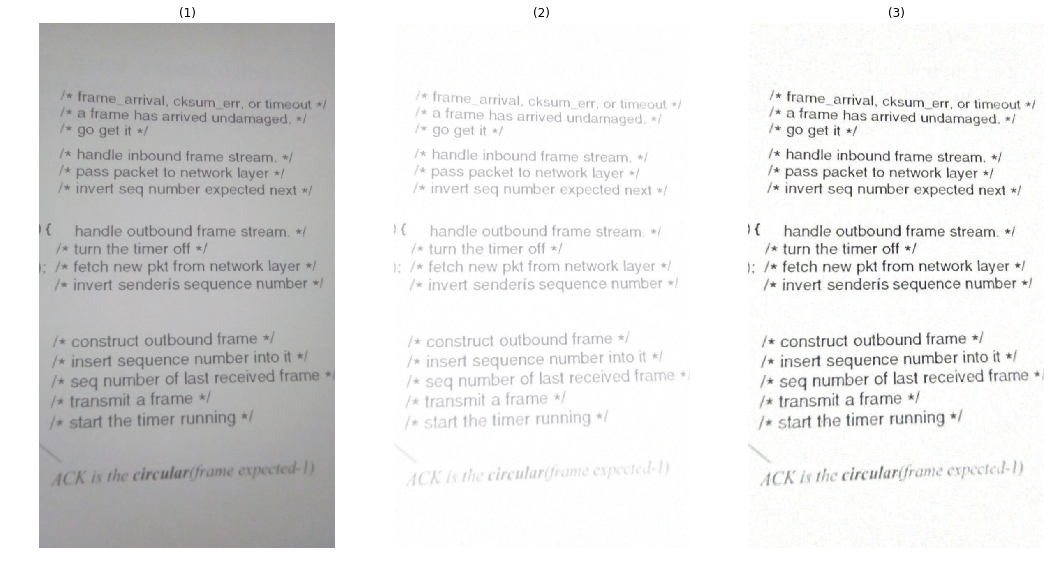

In [3]:
import cv2
import numpy as np

img = cv2.imread('test_cases/7.jpeg', -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((3,3), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

print(result_norm.shape)
result_norm_gray = rgb2gray(result_norm)
show_images([img,result,result_norm])

io.imsave("test_cases/7_shadow.jpeg",np.array((result_norm_gray*255).astype(np.uint8)))